### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [22]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [23]:
sample_true = coffee_red.query('drinks_coffee == True').shape[0]
sample_false = coffee_red.query('drinks_coffee == False').shape[0]
sample_size = coffee_red.shape[0]
sample_true_perc = sample_true/sample_size
sample_false_perc = sample_false/sample_size
print(f'proportion true: {sample_true_perc} \nproportion false: {sample_false_perc}')


proportion true: 0.595 
proportion false: 0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [31]:
coffee_red.query('drinks_coffee == False')['height'].mean()

66.78492279927877

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [25]:
sample_boot = coffee_red.sample(n = 200, replace=True)
sample_boot.head()

,user_id,age,drinks_coffee,height
93,2423,>=21,True,69.540052
1239,4172,>=21,True,71.011189
1756,5529,>=21,True,67.857414
879,2639,>=21,True,68.445535
944,4975,>=21,False,74.276003


In [26]:
sample_boot_true = sample_boot.query('drinks_coffee == True').shape[0]
sample_boot_false = sample_boot.query('drinks_coffee == False').shape[0]
sample_boot_size = sample_boot.shape[0]
sample_boot_true_perc = sample_boot_true/sample_boot_size
sample_boot_false_perc = sample_boot_false/sample_boot_size
print(f'proportion true: {sample_boot_true_perc} \nproportion false: {sample_boot_false_perc}')


proportion true: 0.605 
proportion false: 0.395


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

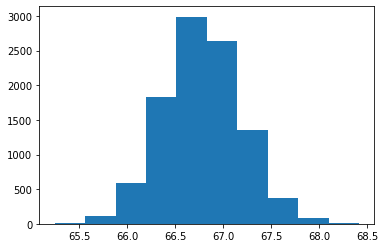

In [27]:
lcv = 10000
height_boot_list = []
for i in range(0,lcv):
    sample_boot = coffee_red.sample(n = 200, replace=True)
    height_boot_list.append(sample_boot.query('drinks_coffee == False')['height'].mean())
plt.hist(height_boot_list);

In [28]:
np.percentile(height_boot_list, 2.5), np.percentile(height_boot_list, 97.5)

(65.9929132815752, 67.58402738281573)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [29]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214705

In [30]:
coffee_full.query('drinks_coffee == False')['height'].mean()

66.44340776214705

In [33]:
np.array(height_boot_list).mean()

66.7806168324155


1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below.

3. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.

4. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.



In [41]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [42]:
lcv = 10000
diffs = []
for i in range(0,lcv):
    sample_boot = coffee_red.sample(n = 200, replace=True)
    height_false = sample_boot.query('drinks_coffee == False')['height'].mean()
    height_true = sample_boot.query('drinks_coffee == True')['height'].mean()
    diffs.append(height_true - height_false)


(0.10258900080921124, 2.538833370796657)

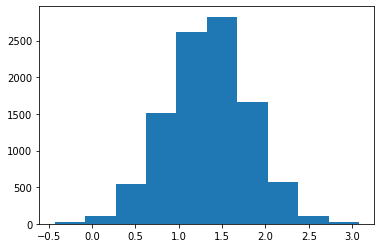

In [43]:
plt.hist(diffs);
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

In [47]:
lcv = 10000
diffs_21 = []
for i in range(0,lcv):
    sample_boot = coffee_red.sample(n = 200, replace=True)
    height_21_older = sample_boot.query('age == ">=21"')['height'].mean()
    height_21_younger = sample_boot.query('age == "<21"')['height'].mean()
    diffs_21.append(height_21_older - height_21_younger)
plt.hist(diffs_21)
np.percentile(diffs_21, 0.5), np.percentile(diffs_21, 99.5)


(3.3652749452554795, 5.0932450670661495)

(-2.8261056080904683, -0.8221780317576606)

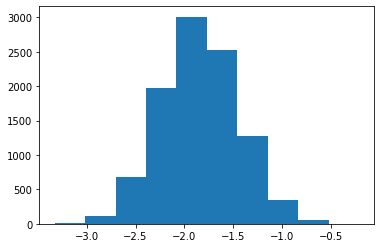

In [49]:
lcv = 10000
diffs = []
for i in range(0,lcv):
    sample_boot = coffee_red.sample(n = 200, replace=True)
    height_false = sample_boot.query('drinks_coffee == False and age == "<21"')['height'].mean()
    height_true = sample_boot.query('drinks_coffee == True and age == "<21"')['height'].mean()
    diffs.append(height_true - height_false)
plt.hist(diffs);
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

(-4.809151113239108, -1.4309574773988463)

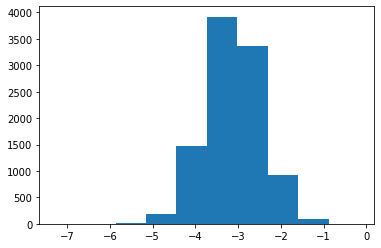

In [50]:
lcv = 10000
diffs = []
for i in range(0,lcv):
    sample_boot = coffee_red.sample(n = 200, replace=True)
    height_false = sample_boot.query('drinks_coffee == False and age == ">=21"')['height'].mean()
    height_true = sample_boot.query('drinks_coffee == True and age == ">=21"')['height'].mean()
    diffs.append(height_true - height_false)
plt.hist(diffs);
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)